In [50]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
# Step 1: Load the Dataset
df = pd.read_csv("usa_housing_kaggle.csv")

## DATA EXPLORATION

In [52]:

#Printing the summary of the dataframe,
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         300 non-null    int64  
 1   Bedrooms      300 non-null    int64  
 2   Bathrooms     300 non-null    float64
 3   SquareFeet    300 non-null    int64  
 4   YearBuilt     300 non-null    int64  
 5   GarageSpaces  300 non-null    int64  
 6   LotSize       300 non-null    float64
 7   ZipCode       300 non-null    int64  
 8   CrimeRate     300 non-null    float64
 9   SchoolRating  300 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 23.6 KB
None


In [53]:
#displaying first five rows
print(df.head())

    Price  Bedrooms  Bathrooms  SquareFeet  YearBuilt  GarageSpaces  LotSize  \
0  221958         1        1.9        4827       1979             2     1.45   
1  771155         2        2.0        1035       1987             2     1.75   
2  231932         1        3.0        2769       1982             1     1.46   
3  465838         3        3.3        2708       1907             3     1.62   
4  359178         4        3.4        1175       1994             2     0.74   

   ZipCode  CrimeRate  SchoolRating  
0    82240      48.60             5  
1    74315      92.03             9  
2    79249      52.08             3  
3    80587      61.65             1  
4    20756      15.66             4  


In [54]:
#checking missing values
print(df.isnull().sum())

Price           0
Bedrooms        0
Bathrooms       0
SquareFeet      0
YearBuilt       0
GarageSpaces    0
LotSize         0
ZipCode         0
CrimeRate       0
SchoolRating    0
dtype: int64


In [55]:
#checking duplicates
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool


In [63]:
#descriptive statistics of numerical columns
print(df.describe())

               Price    Bedrooms   Bathrooms  SquareFeet    YearBuilt  \
count     300.000000  300.000000  300.000000   300.00000   300.000000   
mean   522761.916667    2.966667    2.464000  3052.75000  1962.616667   
std    256922.348275    1.451175    0.886184  1194.97144    36.005431   
min    112666.000000    1.000000    1.000000   840.00000  1902.000000   
25%    299936.500000    2.000000    1.700000  2053.50000  1931.750000   
50%    505806.500000    3.000000    2.400000  3127.00000  1961.000000   
75%    744603.750000    4.000000    3.200000  4081.00000  1994.000000   
max    999684.000000    5.000000    4.000000  4997.00000  2022.000000   

       GarageSpaces     LotSize       ZipCode   CrimeRate  SchoolRating  
count    300.000000  300.000000    300.000000  300.000000    300.000000  
mean       1.513333    1.062200  54324.770000   49.324033      5.096667  
std        1.116832    0.543896  24718.938552   28.833220      2.674165  
min        0.000000    0.110000  10163.000000 

In [57]:
# Step 3: Data Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of House Prices')

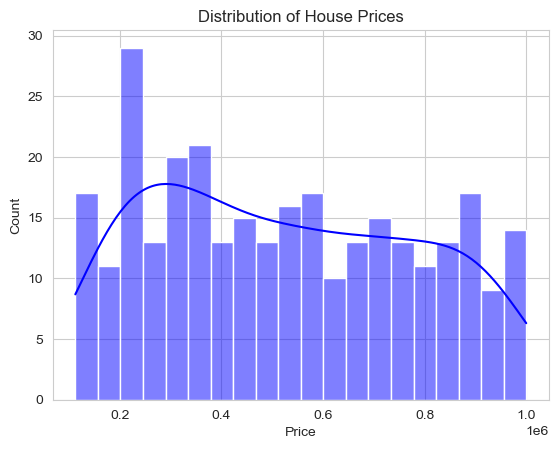

In [58]:
# Histogram of House Prices

sns.histplot(df["Price"], bins=20, kde=True, color="blue")
plt.title("Distribution of House Prices")

Text(0.5, 1.0, 'Feature Correlation Heatmap')

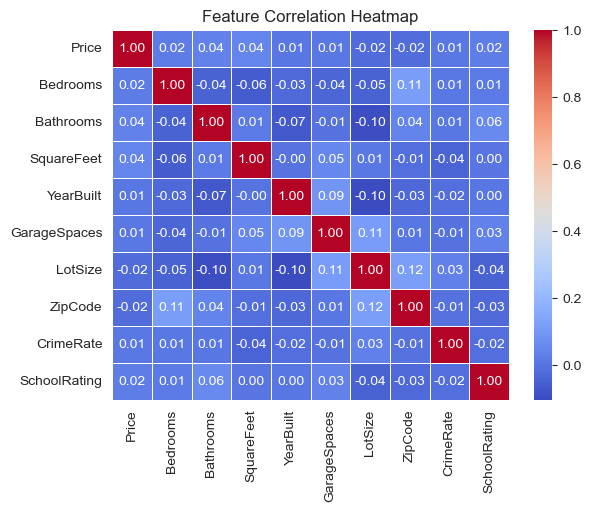

In [59]:
# Correlation Heatmap

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")

Text(0.5, 1.0, 'Square Feet vs. Price')

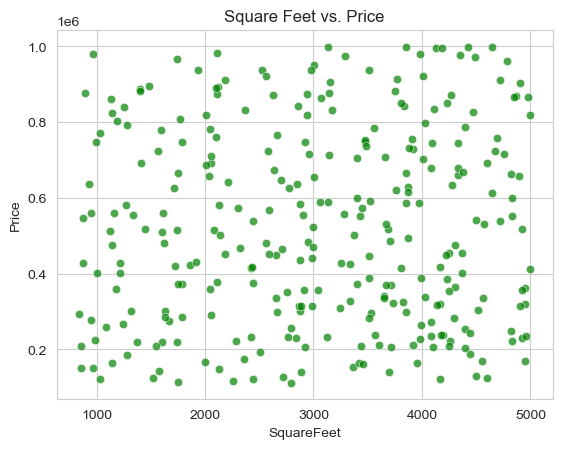

In [60]:
# Scatter Plot: Square Feet vs Price

sns.scatterplot(x=df["SquareFeet"], y=df["Price"], alpha=0.7, color="green")
plt.title("Square Feet vs. Price")


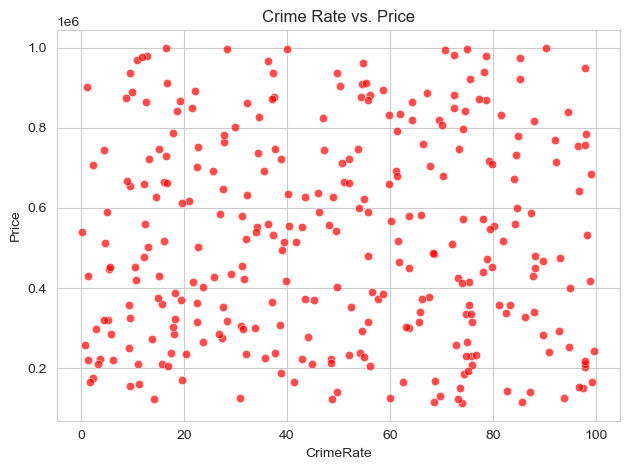

In [61]:
# Scatter Plot: Crime Rate vs Price

sns.scatterplot(x=df["CrimeRate"], y=df["Price"], alpha=0.7, color="red")
plt.title("Crime Rate vs. Price")

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_17868\2164363602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Bedrooms"], y=df["Price"], palette="coolwarm")


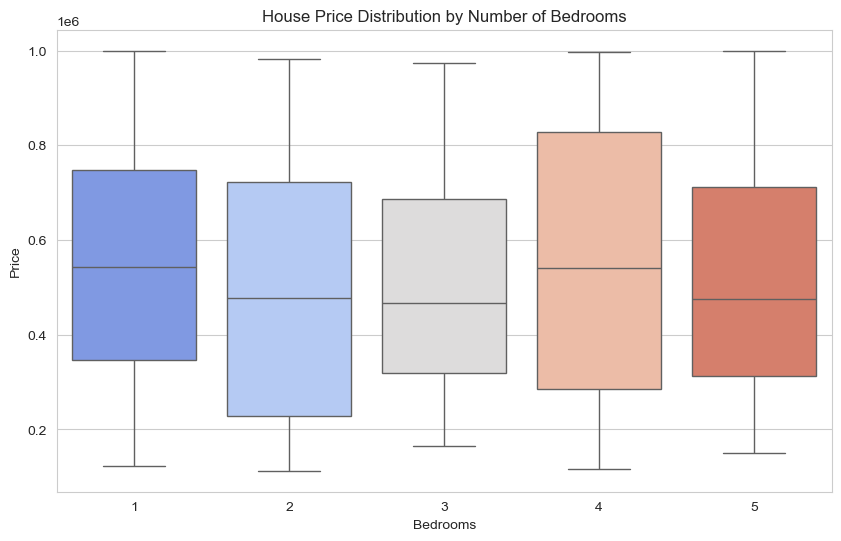

In [62]:
# Additional Visualization: Box Plot of Price by Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Bedrooms"], y=df["Price"], palette="coolwarm")
plt.title("House Price Distribution by Number of Bedrooms")
plt.show()